In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
BatchSize=32
ImageSize=256
Channel=3
Epochs=30

In [ ]:
import tensorflow as tf

# Update the path to your dataset
directory = '/content/drive/MyDrive/Colab Notebooks/potato'

# Create a dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    image_size=(ImageSize, ImageSize),  # Resize images to 256x256
    batch_size=BatchSize          # Number of images to return in each batch
)

# # Display the first batch of images and labels
# for images, labels in dataset.take(1):
#     print(images.shape, labels.shape)


Found 3910 files belonging to 3 classes.


In [ ]:
class_name=dataset.class_names

(32, 256, 256, 3)
[0 1 2 0 2 0 0 2 1 0 2 0 0 2 2 2 0 2 0 2 2 1 0 0 2 2 2 2 0 2 1 0]


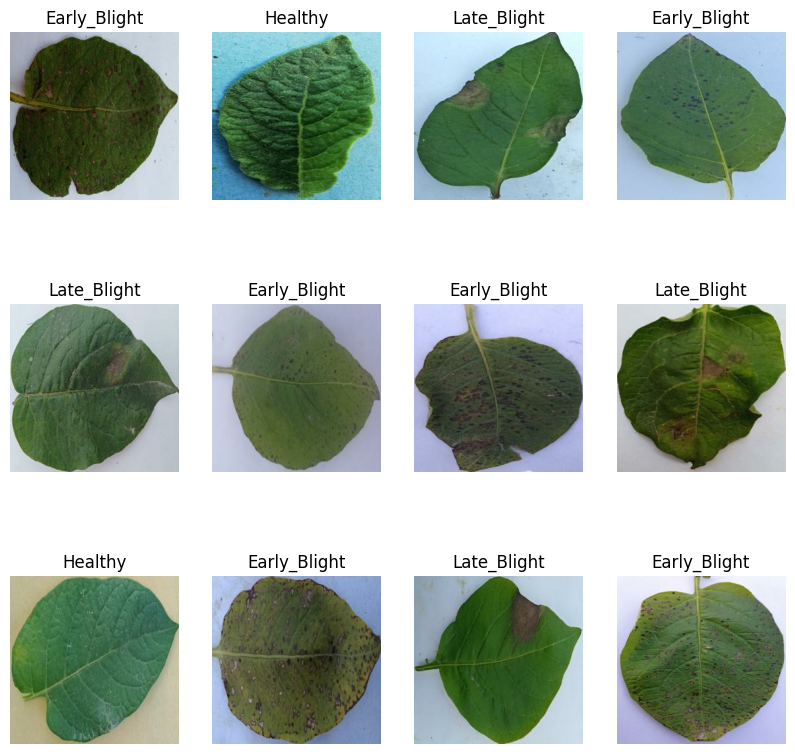

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")


In [ ]:
train_size=0.8
len(dataset)*train_size

98.4

In [ ]:
train_ds=dataset.take(98)

In [ ]:
len(train_ds)

98

In [ ]:
test_ds=dataset.skip(98)

In [ ]:
len(test_ds)

25

In [ ]:
val_size=0.1
len(dataset)*val_size

12.3

In [ ]:
val_ds=test_ds.take(12)
len(val_ds)

12

In [ ]:
test_ds=test_ds.skip(12)
len(test_ds)

13

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+val_split+test_split)==1

    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

98

In [ ]:
print(train_ds)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
len(val_ds)

12

In [ ]:
len(test_ds)

13

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)


[[[0.8156863  0.8352941  0.9137255 ]
  [0.8117647  0.83137256 0.9098039 ]
  [0.8117647  0.83137256 0.9098039 ]
  ...
  [0.65882355 0.6745098  0.7882353 ]
  [0.65882355 0.6745098  0.7882353 ]
  [0.65882355 0.6745098  0.7882353 ]]

 [[0.8156863  0.8352941  0.9137255 ]
  [0.8117647  0.83137256 0.9098039 ]
  [0.8117647  0.83137256 0.9098039 ]
  ...
  [0.65882355 0.6745098  0.7882353 ]
  [0.65882355 0.6745098  0.7882353 ]
  [0.65882355 0.6745098  0.7882353 ]]

 [[0.8156863  0.8352941  0.9137255 ]
  [0.8117647  0.83137256 0.9098039 ]
  [0.8117647  0.83137256 0.9098039 ]
  ...
  [0.65882355 0.6745098  0.7882353 ]
  [0.65882355 0.6745098  0.7882353 ]
  [0.65882355 0.6745098  0.7882353 ]]

 ...

 [[0.78431374 0.8117647  0.8862745 ]
  [0.78039217 0.80784315 0.88235295]
  [0.78039217 0.80784315 0.88235295]
  ...
  [0.65882355 0.6627451  0.77254903]
  [0.65882355 0.6627451  0.77254903]
  [0.654902   0.65882355 0.76862746]]

 [[0.78431374 0.8117647  0.8862745 ]
  [0.78039217 0.80784315 0.88235295]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)


(256, 256, 3)


In [ ]:
from tensorflow.keras import layers, Sequential

resize_and_rescale = Sequential([
    layers.Resizing(ImageSize, ImageSize),
    layers.Rescaling(1.0/255)
])


In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers, models, regularizers

In [ ]:

from keras.models import Model
from keras.layers import Dense, Dropout, concatenate, LeakyReLU, ReLU
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation,ZeroPadding2D,Flatten
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Reshape, add
from keras.utils import to_categorical
from keras.layers import ReLU
from keras import backend as K
from keras import optimizers


from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

import numpy as np

#opt = Adam(lr=0.001, beta_1=0.5, beta_2=0.999)
opt = Adam(learning_rate=0.001, beta_1=0.5, beta_2=0.999)

def residual_block(input):
    """
    Residual block in the generator network
    """
    x = Conv2D(128 * 4, kernel_size=(3, 3), padding='same', strides=1)(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(128 * 4, kernel_size=(3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    x = add([x, input])
    x = ReLU()(x)

    return x
img_shape = (256, 256, 3)

input_layer = Input(shape=(256, 256, 3))
x = ZeroPadding2D(padding=(1, 1))(input_layer)
x = Conv2D(128, kernel_size=(3, 3), strides=1, use_bias=False)(x)
x = ReLU()(x)

x = ZeroPadding2D(padding=(1, 1))(x)
x = Conv2D(256, kernel_size=(4, 4), strides=2, use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = ZeroPadding2D(padding=(1, 1))(x)
x = Conv2D(512, kernel_size=(4, 4), strides=2, use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = residual_block(x)
x = residual_block(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)#(x, training=True)

x = residual_block(x)
x = residual_block(x)

x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)#(x, training=True)
#x=Dropout(0.25)(x)
#x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(128)(x)
x=ReLU()(x)

x = BatchNormalization(axis=-1)(x)
x = Dropout(0.5)(x)
output_layer=Dense(3, activation='softmax')(x)
model = Model(inputs=[input_layer], outputs=[output_layer])

#model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['binary_accuracy'])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
model.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_9          │ (None, 258, 258, 3)    │              0 │ input_layer_3[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 256, 256, 128)  │          3,456 │ zero_padding2d_9[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_36 (ReLU)           │ (None, 256, 256, 128)  │              0 │ conv2d_33[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_10         │ (None, 258, 258, 128)  │              0 │ re_lu_36[0][0]         │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 128, 128, 256)  │        524,288 │ zero_padding2d_10[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_33    │ (None, 128, 128, 256)  │          1,024 │ conv2d_34[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_37 (ReLU)           │ (None, 128, 128, 256)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_11         │ (None, 130, 130, 256)  │              0 │ re_lu_37[0][0]         │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 64, 64, 512)    │      2,097,152 │ zero_padding2d_11[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_34    │ (None, 64, 64, 512)    │          2,048 │ conv2d_35[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_38 (ReLU)           │ (None, 64, 64, 512)    │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_36 (Conv2D)        │ (None, 64, 64, 512)    │      2,359,808 │ re_lu_38[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_35    │ (None, 64, 64, 512)    │          2,048 │ conv2d_36[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_39 (ReLU)           │ (None, 64, 64, 512)    │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_37 (Conv2D)        │ (None, 64, 64, 512)    │      2,359,808 │ re_lu_39[0][0]         │
├──────────────────────

 Total params: 38,301,059 (146.11 MB)

 Trainable params: 38,291,075 (146.07 MB)

 Non-trainable params: 9,984 (39.00 KB)

In [ ]:
from keras.optimizers import Adam

opt = Adam(learning_rate=0.001, beta_1=0.5, beta_2=0.999)

model.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
#weight_path="{}_weights.best.hdf5".format('xray_class')### for kaggle
#weight_path="'../input/potato/potato/'"### for colab
weight_path = '/content/drive/My Drive/potato_weights/'
#checkpoint_dir = os.path.dirname(weight_path)

checkpoint = ModelCheckpoint(weight_path+'wight2.weights.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=3)
callbacks_list = [checkpoint, early]

In [ ]:
w_path="/content/drive/My Drive/potato_weights/wight1.weights.h5"### for colab


In [ ]:
model.load_weights(w_path)

In [ ]:
score = model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 481s 724ms/step - accuracy: 0.9951 - loss: 0.0166


In [ ]:
score

[0.021928302943706512, 0.9903846383094788]

In [ ]:
history.params

NameError: name 'history' is not defined

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
len(history.history['loss'])

12

In [ ]:
len(history.history['accuracy'])

12

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

NameError: name 'acc' is not defined

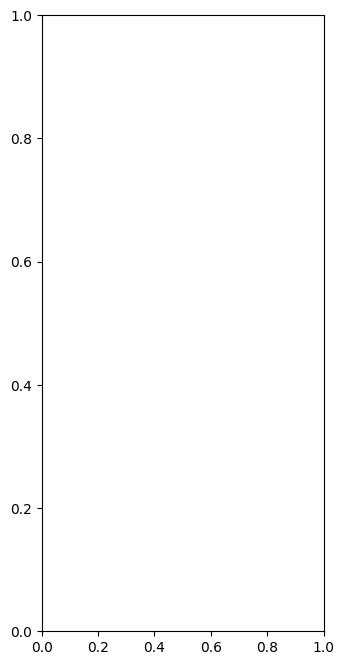

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


First image to predict


TypeError: list indices must be integers or slices, not method

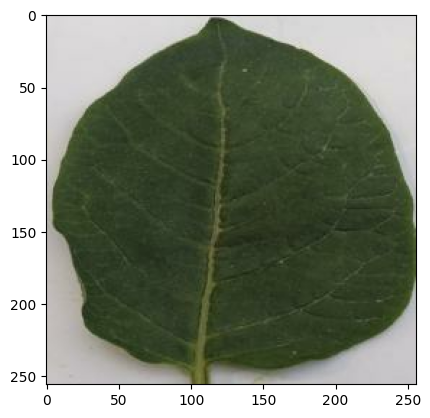

In [ ]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label :",class_name[labels_batch[0].numpy])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label :", class_name[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model , img):
    img_arry = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arry=tf.expand_dims(img_arry, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

NameError: name 'img_array' is not defined

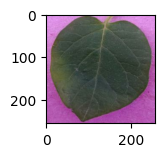

In [ ]:
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class}, \n Predicted : {predicted_class}, \n Confidence : {confidence}%")
#         plt.axis("off")

In [ ]:
# Example: Save the entire model
model.save('/content/drive/MyDrive/Colab Notebooks/PDDCUD.h5')

# # Example: Save only the weights
# # model.save_weights('/path/to/save/weights')
# # Example: Load the entire model
# loaded_model = tf.keras.models.load_model('/path/to/save/model')
# # Example: Create a new model with the same architecture
# model = create_model()  # Define your model architecture function

# # Load weights into the model
# model.load_weights('/path/to/save/weights')
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Example: Define and compile a simple model
# def create_model():
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(100,)),
#         Dense(10, activation='softmax')
#     ])
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Example: Train the model
# model = create_model()
# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# # Example: Save the entire model
# model.save('/path/to/save/model')

# # Example: Load the entire model
# loaded_model = tf.keras.models.load_model('/path/to/save/model')

# # Example: Use the loaded model for prediction
# predictions = loaded_model.predict(x_test)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os

save_path = '/content/drive/MyDrive/Colab Notebooks/PDDCUD.h5'

# Check if the file exists
if os.path.exists(save_path):
    print(f"Model saved successfully at: {save_path}")
else:
    print(f"Model save failed. File not found at: {save_path}")



Model saved successfully at: /content/drive/MyDrive/Colab Notebooks/PDDCUD.h5


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the custom loss class
class CustomSparseCategoricalCrossentropy(SparseCategoricalCrossentropy):
    def __init__(self, reduction='sum_over_batch_size', name='sparse_categorical_crossentropy', from_logits=False, ignore_class=None, fn=None):
        # Validate the reduction argument
        valid_reductions = {'sum', 'sum_over_batch_size', None, 'none'}
        if reduction not in valid_reductions:
            reduction = 'sum_over_batch_size'  # Default to a valid value

        super().__init__(reduction=reduction, name=name, from_logits=from_logits)

# Custom objects dictionary
custom_objects = {
    'SparseCategoricalCrossentropy': CustomSparseCategoricalCrossentropy
}

# Load the model with custom objects
model = load_model('/content/drive/MyDrive/Colab Notebooks/PDDCUD.h5', custom_objects=custom_objects)


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Define the labels for your disease classes
labels = ['Early_Blight', 'Healthy', 'Late_Blight']

def predict_disease(image):
    # Convert the uploaded image to RGB and resize it to the input size expected by the model
    image = Image.fromarray(image)
    image = image.convert('RGB')
    image = image.resize((256, 256))
    image = np.array(image)

    # Normalize the image
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict the disease
    predictions = model.predict(image)
    predicted_class = labels[np.argmax(predictions)]
    confidence_scores = {label: float(predictions[0][i]) for i, label in enumerate(labels)}

    return predicted_class, confidence_scores

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(),
    outputs=[gr.Textbox(label="Predicted Class"), gr.Label(label="Confidence Scores")],
    title="Potato Disease Identification (by: Pervez Abbas)"
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c87766f025ced42b32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
